# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# **DATA PROCESSING**

In [2]:
url = "https://github.com/EstiAsmareta/dataset-sentimen-analisis/raw/main/fraudJobDetection.xlsx"
df = pd.read_excel(url)

In [3]:
df['text'] = df['text'].str.lower()
df

,id,tag,text
0,1,real_project_job,pengembangan sistem informasi geografis
1,2,real_project_job,analisis data untuk optimasi logistik
2,3,real_project_job,desain web untuk toko online kecil
3,4,real_project_job,implementasi erp untuk manufaktur
4,5,real_project_job,manajemen media sosial untuk brand fashion
...,...,...,...
1490,1491,real_project_job,pengembang web diperlukan untuk proyek e-comme...
1491,1492,real_project_job,perusahaan teknologi mencari pengembang untuk ...
1492,1493,real_project_job,pengembang aplikasi diperlukan untuk membuat s...
1493,1494,real_project_job,spesialis it diperlukan untuk mengelola server...


In [4]:
df[df['tag'] == 'real_project_job']['tag'].count()

800

In [5]:
df[df['tag'] == 'fraud_project_job']['tag'].count()

695

In [6]:
tag = pd.get_dummies(df.tag)
df_baru = pd.concat([df, tag], axis=1)
df_baru = df_baru.drop(columns='tag')
df_baru = df_baru.drop(columns='id')
df_baru

,text,fraud_project_job,real_project_job
0,pengembangan sistem informasi geografis,False,True
1,analisis data untuk optimasi logistik,False,True
2,desain web untuk toko online kecil,False,True
3,implementasi erp untuk manufaktur,False,True
4,manajemen media sosial untuk brand fashion,False,True
...,...,...,...
1490,pengembang web diperlukan untuk proyek e-comme...,False,True
1491,perusahaan teknologi mencari pengembang untuk ...,False,True
1492,pengembang aplikasi diperlukan untuk membuat s...,False,True
1493,spesialis it diperlukan untuk mengelola server...,False,True


# **SPLITTING THE DATASET**

In [7]:
text = df_baru['text'].values
label = df_baru[['fraud_project_job','real_project_job']].values

text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

# **TOKENIZER**

In [8]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

# **PADDING**

In [9]:
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

# **BUILD MODEL**

In [10]:
from tensorflow.keras.regularizers import l1, l2

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=3)

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),  # Adjust embedding dimension if needed
    tf.keras.layers.LSTM(64, return_sequences=True),  # Experiment with return_sequences
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.9)),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),  # Adjust embedding dimension if needed
    tf.keras.layers.LSTM(128, return_sequences=True),  # Experiment with return_sequences
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.9)),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
num_epochs = 10
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/10
38/38 - 9s - loss: 90.7100 - accuracy: 0.5293 - val_loss: 62.4473 - val_accuracy: 0.5151 - 9s/epoch - 241ms/step
Epoch 2/10
38/38 - 4s - loss: 45.2120 - accuracy: 0.7467 - val_loss: 30.1987 - val_accuracy: 0.9666 - 4s/epoch - 98ms/step
Epoch 3/10
38/38 - 2s - loss: 21.4532 - accuracy: 0.8896 - val_loss: 13.9533 - val_accuracy: 0.9967 - 2s/epoch - 54ms/step
Epoch 4/10
38/38 - 2s - loss: 9.8019 - accuracy: 0.9457 - val_loss: 6.2406 - val_accuracy: 0.9799 - 2s/epoch - 50ms/step
Epoch 5/10
38/38 - 2s - loss: 4.3893 - accuracy: 0.9423 - val_loss: 2.7746 - val_accuracy: 0.9933 - 2s/epoch - 51ms/step
Epoch 6/10
38/38 - 2s - loss: 2.0185 - accuracy: 0.9482 - val_loss: 1.3048 - val_accuracy: 0.9866 - 2s/epoch - 50ms/step
Epoch 7/10
38/38 - 2s - loss: 1.0265 - accuracy: 0.9507 - val_loss: 0.7123 - val_accuracy: 0.9933 - 2s/epoch - 49ms/step
Epoch 8/10
38/38 - 3s - loss: 0.6390 - accuracy: 0.9574 - val_loss: 0.4694 - val_accuracy: 0.9933 - 3s/epoch - 90ms/step
Epoch 9/10
38/38 - 2s - l

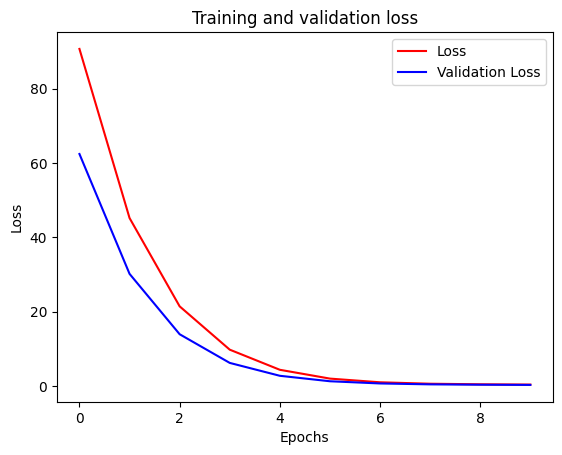

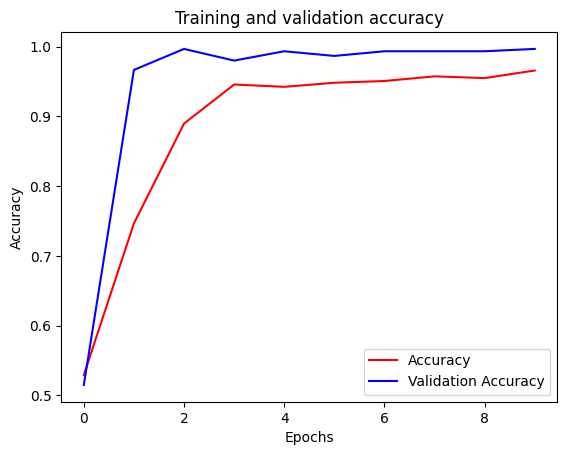

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [14]:
print(f"Training Accuracy: {max(acc):.3f}")
print(f"Validation Accuracy: {max(val_acc):.3f}")

Training Accuracy: 0.966
Validation Accuracy: 0.997


In [16]:
# Save the model in .h5 format
model.save('my_nlp_model.h5')

# Download the model (optional if you want to download it)
# from google.colab import files
# files.download('my_nlp_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Load the model for prediction
from tensorflow.keras.models import load_model
loaded_model = load_model('my_nlp_model.h5')

# Get the predicted class label
import numpy as np

text_example = ["Berhadiah Uang Tunai Jutaan RUpiah"]
sequences_example = tokenizer.texts_to_sequences(text_example)
padded_example = pad_sequences(sequences_example)
predictions = loaded_model.predict(padded_example)
print(predictions)

predicted_class_index = np.argmax(predictions)
class_labels = ['fraud_project_job','real_project_job']
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

1/1 [==============================] - 1s 950ms/step
[[0.6734734  0.32652655]]
fraud_project_job


In [18]:
import pickle

# Save tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully.")



Tokenizer saved successfully.


In [19]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0
